In [1]:
from rhana.labeler.masker import UnetMasker, _default_learner

In [2]:
from rhana.io.kashiwa import find_raw_rheed

In [3]:
from pathlib import Path

In [4]:
from rhana.pattern import Rheed, RheedMask

In [5]:
rheeds = find_raw_rheed(Path("~/RHEED/data/RHEED").expanduser())

In [6]:
masker = UnetMasker(_default_learner)

AttributeError: Can't get attribute 'dice_metric' on <module '__main__'>

# Show case for masking one RHEED pattern

In [12]:
rd = Rheed.from_kashiwa(rheeds['IT013'][0])

In [13]:
rd = rd.mean_clip().min_max_scale()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

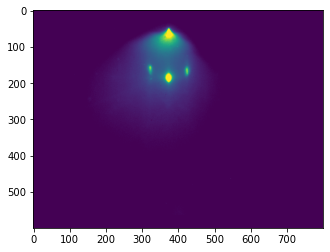

In [14]:
rd.plot_pattern()

In [ ]:
masks = masker.predict(rd)

In [ ]:
for k, v in masks:
    plt.title(k)
    plt.imshow(v)
    plt.show()

In [ ]:
rdm = RheedMask(rd, masks['spot'])

In [ ]:
rdm.get_regions(with_intensity=True)

In [ ]:
rdm.filter_regions(min_area=10)

In [ ]:
rdm.plot_regions()

# Find all the initial direct beam location with naive approach 

In [ ]:
for IT in rheeds.keys():
    if len(rheed_all[IT])==0: continue
    rd = Rheed.from_kashiwa(rheed_all[IT][0])
    rd = rd.mean_clip().min_max_scale()

    masks = masker.predict(rd)

    rdm = RheedMask(rd, masks['spot'])
    rdm.get_regions(with_intensity=True)
    rdm.filter_regions(min_area=10)

    # this line find the direct beam location
    # you can manually setup the xy if the naive approach didn't work
    xy = rdm.get_direct_beam()

    rdm.plot_region(0)
    plt.scatter(xy[0], xy[1])
    